## Analyze A/B Test Results

Rami Salman - Palestine

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusions](#conclusions)
- [References](#ref)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, I worked to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [4]:
df=pd.read_csv('data/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [5]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [6]:
df.nunique()['user_id']

290584

d. The proportion of users converted.

In [7]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
(df[((df['group']=='treatment') & (df['landing_page'] !='new_page' )) | ((df['group']!='treatment') & (df['landing_page'] =='new_page' ))]).shape[0]

3893

f. Do any of the rows have missing values?

In [9]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


no null values!


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
to_drop_index=df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].index
to_drop_index

Int64Index([    22,    240,    308,    327,    357,    490,    685,    713,
               776,    846,
            ...
            293817, 293888, 293894, 293917, 293996, 294014, 294200, 294252,
            294253, 294331],
           dtype='int64', length=3893)

as the result of above cell, their is 3893 row where treatment and new_page not align **or** control and old_page not align ! i will drop them

In [11]:
df2=df.drop(to_drop_index)

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

as expected

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
(df2[df2.user_id.duplicated()]).user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
dup_index=df2[df2.user_id.duplicated()].index
dup_index

Int64Index([2893], dtype='int64')

In [17]:
df2=df2.drop(dup_index)

In [18]:
df2.shape

(290584, 5)

In [19]:
#to ensure that there is one record for that user
df2[df2.user_id==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [21]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
control_group=df2[df2.group=='control']
control_group.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [23]:
control_group.converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [24]:
treatment_group=df2[df2.group=='treatment']

In [25]:
treatment_group.converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [26]:
df2.groupby('landing_page')['landing_page'].count()/df2.shape[0]

landing_page
new_page    0.500062
old_page    0.499938
Name: landing_page, dtype: float64

In [27]:
df2.groupby('landing_page')['landing_page'].count()['new_page']/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [28]:
control_group.converted.mean()-treatment_group.converted.mean()

0.0015782389853555567

- P(converted |group=treatment)=0.11880806
- P(converted |group=control)=0.120386
- as a reslut , old pages(control group) little bit better than new pages(treatment group) with difference of 0.001578!
- probability of conversion (user receive new page)= 50% ,so we can't depend on it only to compare the performance , test span durations are not accounted , that maybe affect the performance of both pages.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

- **$H_{0}$** : **$p_{old}$** >=**$p_{new}$**
- **$H_{1}$** : **$p_{old}$** < **$p_{new}$**  

- **in other words:**

- **$H_{0}$** : **$p_{new}$** - **$p_{old}$** <= 0
- **$H_{1}$** :  **$p_{new}$** - **$p_{old}$** >0
- **and then :**
- **$H_{0}$** : **$p_{new}$** <= **$p_{old}$**
- **$H_{1}$** : **$p_{new}$** > **$p_{old}$**


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [29]:
p_new=p_old=df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [30]:
p_old

0.11959708724499628

c. What is $n_{new}$?

In [31]:
df2.head(1)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0


In [32]:
n_new=(df2[df2.landing_page=='new_page']).shape[0]
n_new

145310

d. What is $n_{old}$?

In [33]:
n_old=(df2[df2.landing_page=='old_page']).shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [34]:
new_page_converted=np.random.choice([1,0],n_new,[p_new,1-p_new])
new_page_converted.shape[0]

145310

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [35]:
old_page_converted=np.random.choice([1,0],n_old,[p_old,1-p_old])
old_page_converted.shape[0]

145274

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [36]:
p_new-p_old

0.0

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [37]:
#simulate 10000 trials using numpy built in function
p_diffs=[]
new_converted_simulation = np.random.binomial(n_new, p_new,  10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old,  10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

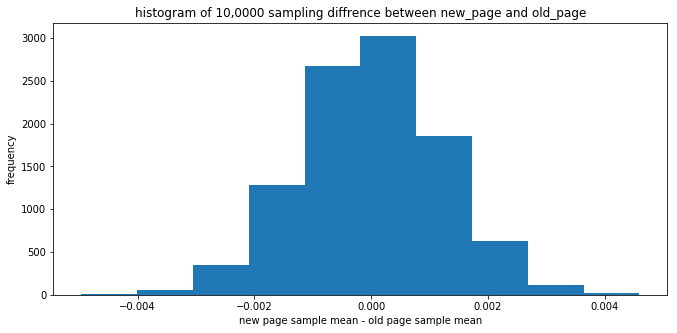

In [38]:
plt.figure(figsize = (11,5))
plt.hist(p_diffs)
plt.title('histogram of 10,0000 sampling diffrence between new_page and old_page')
plt.xlabel('new page sample mean - old page sample mean');
plt.ylabel('frequency');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [39]:
df2.head(1)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0


In [40]:
actual_diff=df2[df2.landing_page=='new_page']['converted'].mean()-df2[df2.landing_page=='old_page']['converted'].mean()

In [41]:
actual_diff

-0.0015782389853555567

In [42]:
(actual_diff<np.array(p_diffs)).mean()

0.9032

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**answer:**
- the calculated value is **p-value**.
- as i learned from the lessons , it is the conditional probability our statistic given that the null hypothesis is true . 
- the p-value is very high! , so we fail to reject the null hypothesis . In other words , **no advantage of change from old to new pages .**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [43]:
df.head(1)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0


In [44]:
import statsmodels.api as sm

convert_old = sum(df2.query('landing_page=="old_page"')['converted'])
convert_new = sum(df2.query('landing_page=="new_page"')['converted'])
print(n_old,n_new,convert_old,convert_new) 

145274 145310 17489 17264


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [45]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old,n_new], alternative='smaller')
z_score,p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [46]:
from scipy.stats import norm
# Tells us how significant our z-score is
print(norm.cdf(z_score))

# for our single-sides test, assumed at 95% confidence level, we calculate: 
print(norm.ppf(1-(0.05)))

0.9050583127590245
1.6448536269514722


**answer:**
- as a result , z-score equals 1.31 which is less than the critical value of 1.64485362695,so again we fail to reject the null hypothesis .So again we acheive that old pages better than new pages and then **no need to convert to new pages**.
- Yes , the calculated values of previous few steps Agreed with results of parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [47]:
df2[['treatment','control']]=pd.get_dummies(df2['group'])

In [48]:
df2.head()

,user_id,timestamp,group,landing_page,converted,treatment,control
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [49]:
df2['ab_page']=df2['control']

In [50]:
df2.head(5)

,user_id,timestamp,group,landing_page,converted,treatment,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0


In [51]:
df2=df2.drop(['group','treatment','control'],axis=1)

In [52]:
df2.head(1)

,user_id,timestamp,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,old_page,0,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [53]:
import statsmodels.api as sm

df2['intercept']=1
logit = sm.Logit(df2['converted'],df2[['intercept' ,'ab_page']])
res = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [54]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 28 Jan 2019   Pseudo R-squ.:               8.077e-06
Time:                        15:01:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

- p-value of ab_page is 0.190 , it is not equal to p-value of part II because the previous one is two sided test , but part II test is one sided test.

- **hypothesis:**
- **$h_{0}$** : **$p_{new}$** - **$p_{old}$**<= 0
- **$h_{1}$** : **$p_{new}$** - **$p_{old}$** > 0


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**answer:**
- their is other factors may affect whether or not student converts. like age ,gender, period , season(different from country to country ), pre knowledge .
- as the Simpson's paradox phenomenon , it's possible to draw opposite conclusions from the same data depending on how divide things up. That means gathering many of these features togother may lead to unreliable estimates of regression coefficients that affect our model !

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [55]:
countries_df = pd.read_csv('data/countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [56]:
df_new.head(2)

,country,timestamp,landing_page,converted,ab_page,intercept
user_id,,,,,,
834778,UK,2017-01-14 23:08:43.304998,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,new_page,0,1,1


In [57]:
### Create the necessary dummy variables
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [58]:
df_new[['US','UK']]=pd.get_dummies(df_new['country'])[['US','UK']]

In [59]:
df_new.head(2)

,country,timestamp,landing_page,converted,ab_page,intercept,US,UK
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,old_page,0,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,new_page,0,1,1,1,0


In [60]:
df_new=df_new.drop('country',axis=1)
df_new.head(2)

,timestamp,landing_page,converted,ab_page,intercept,US,UK
user_id,,,,,,,
834778,2017-01-14 23:08:43.304998,old_page,0,0,1,0,1
928468,2017-01-23 14:44:16.387854,new_page,0,1,1,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [61]:
### Fit Your Linear Model And Obtain the Results
df_new['intercept']=1
logit = sm.Logit(df_new['converted'],df_new[['intercept','US' ,'UK']])
result2 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [62]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 28 Jan 2019   Pseudo R-squ.:               1.521e-05
Time:                        15:01:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

In [63]:
np.exp(result2.params['US'])

1.041646846892446

In [64]:
np.exp(result2.params['UK'])

1.052027486340335

<a id='conclusions'></a>
## Conclusions


- as a result of a/b test , the p-value is high ! so we failed to reject the null hypothesis (**$h_{0}$** : **$p_{new}$** <= **$p_{old}$**) . That means the new pages not better than the old ones , so their is no need to change to new pages. 
- And as the result of logistic regression , thier is no big difference between new and old pages conversions , so we got the same result of fail to reject the null hypothesis and keep the pages without change.

<a id='ref'></a>
## References :
- [1] : udacity nanodegree videos,documentation , quizzes and other links.
- [2] : python documentation of libraries.
- [3] : https://www.youtube.com/watch?v=ebEkn-BiW5k
- [4] : udacity review
- [5] : https://softwareengineering.stackexchange.com/questions/254475/how-do-i-move-away-from-the-for-loop-school-of-thought

In [65]:
from subprocess import call
call(['python','-m','nbconvert','Analyze_ab_test_results_notebook.iynp'])

4294967295